In [44]:
import os
import glob

import xarray as xr
import numpy as np

read_dir = '/home/hanna/lagrings/ERA5_monthly/'
save_dir = '/home/hanna/lagrings/ERA5_stats/results/'

STATS = ['mean', 'median', 'MAD', 'STD', 'min', 'max', "q10", 'q90']
variable = 'r'

%matplotlib inline

In [18]:
filter_dir = '/home/hanna/MS-suppl/filters/'

In [20]:
filters

['/home/hanna/MS-suppl/filters/land_mask_50p_threshhold.nc',
 '/home/hanna/MS-suppl/filters/area_weighted_land_mask.nc',
 '/home/hanna/MS-suppl/filters/artefact.nc',
 '/home/hanna/MS-suppl/filters/sea.nc',
 '/home/hanna/MS-suppl/filters/coastline.nc']

In [21]:
filt = xr.open_dataset(filters[3])

In [22]:
filt

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 161)
Coordinates:
  * longitude  (longitude) float64 -15.0 -14.75 -14.5 -14.25 ... 24.5 24.75 25.0
  * latitude   (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
Data variables:
    land_mask  (latitude, longitude) float64 ...

In [23]:
filt['land_mask'].values

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [3]:
files = glob.glob(os.path.join( read_dir, '*{}.nc'.format(variable)))

In [4]:
len(files)

180

In [5]:
test_case = files[:2]

In [6]:
test_case

['/home/hanna/lagrings/ERA5_monthly/2012_01_r.nc',
 '/home/hanna/lagrings/ERA5_monthly/2013_01_r.nc']

In [7]:
datasets = [xr.open_dataset(fil) for fil in test_case]

In [8]:
data = xr.merge(datasets)

In [11]:
data.mean(dim = 'time').

<xarray.Dataset>
Dimensions:        (latitude: 81, longitude: 161)
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 1000
  * latitude       (latitude) float64 50.0 49.75 49.5 49.25 ... 30.5 30.25 30.0
  * longitude      (longitude) float64 -15.0 -14.75 -14.5 ... 24.5 24.75 25.0
Data variables:
    r              (latitude, longitude) float32 79.504875 79.46648 ... 53.94294

<xarray.Dataset>
Dimensions:        (latitude: 81, longitude: 161)
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 1000
  * latitude       (latitude) float64 50.0 49.75 49.5 49.25 ... 30.5 30.25 30.0
  * longitude      (longitude) float64 -15.0 -14.75 -14.5 ... 24.5 24.75 25.0
Data variables:
    r              (latitude, longitude) float32 79.504875 79.46648 ... 53.94294

In [52]:
STATS = ['mean', 'median',  'std', 'min', 'max'] # 'MAD', 'q10', 'q90'

In [55]:
dimensions = ['latitude', 'longitude']
res_dict = {}
lon = data.longitude.values
lat = data.latitude.values

for statistics in STATS:
    result = eval("data.{}()".format(statistics))['r'].values
    res_dict[statistics] = result
    
res = (data - data.mean()).median()['r'].values
res_dict['MAD'] = res 

result = xr.Dataset(res_dict)

In [56]:
result

<xarray.Dataset>
Dimensions:  ()
Data variables:
    mean     float32 72.18253
    median   float32 74.346436
    std      float32 17.436144
    min      float32 -0.63401586
    max      float32 132.24454
    MAD      float32 2.1639023

In [48]:
result['MAD'].plot()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

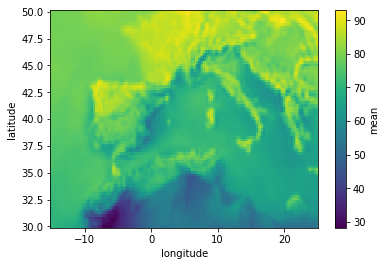

In [46]:
result['mean'].plot()